In [ ]:
# Importing all necessary libraries required for this coursework

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score

!pip install --upgrade spacy

# Reading the Dataset

In [ ]:
data = pd.read_csv('comp1804_coursework_dataset_23-24.csv')
data

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough
...,...,...,...,...,...,...,...,...
9342,200523007578,Sir Joseph Dalton Hooker was a British botani...,ORG_YES_PRODUCT_NO_PERSON_YES_,54,16.0,man,biographies,NaN
9343,50634005203,As successful invasions of India generally cam...,ORG_YES_PRODUCT_NO_PERSON_YES_,217,46.0,woman,biographies,NaN
9344,6437003939,Hawking was born on 8 January 1942 in Oxford t...,ORG_YES_PRODUCT_NO_PERSON_YES_,91,27.0,woman,biographies,NaN
9345,725259002815,More complex tasks can be making custom data e...,ORG_YES_PRODUCT_NO_PERSON_NO_,47,15.0,man,programming,NaN


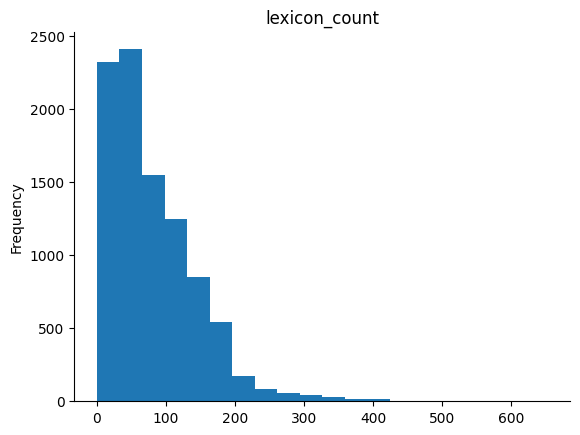

In [ ]:
# @title lexicon_count

from matplotlib import pyplot as plt
data['lexicon_count'].plot(kind='hist', bins=20, title='lexicon_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Statistics Summary

In [ ]:
data. describe()

,par_id,lexicon_count,difficult_words
count,9.347000e+03,9347.000000,9329.000000
mean,3.568369e+11,81.981277,21.514203
std,3.221399e+11,63.533532,16.307358
min,8.500328e+07,0.000000,0.000000
25%,7.019601e+10,33.000000,9.000000
50%,2.684380e+11,64.000000,17.000000
75%,6.124310e+11,117.000000,30.000000
max,1.058779e+12,653.000000,143.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9347 entries, 0 to 9346
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9347 non-null   int64  
 1   paragraph           9347 non-null   object 
 2   has_entity          9347 non-null   object 
 3   lexicon_count       9347 non-null   int64  
 4   difficult_words     9329 non-null   float64
 5   last_editor_gender  9347 non-null   object 
 6   category            9286 non-null   object 
 7   text_clarity        9 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 584.3+ KB


In [ ]:
data.shape

(9347, 8)

In [ ]:
data.ndim

2

# Handling and Imputing msising values

In [ ]:
## Checking for missing values in the  dataset
data.isnull().sum()

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64

In [ ]:
data.dropna(subset=['difficult_words'], inplace=True)

In [ ]:
data.isnull().sum()

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words          0
last_editor_gender       0
category                61
text_clarity          9320
dtype: int64

# Checking and dropping duplicates

In [ ]:
# Printing data after removing duplicate rows in the input parameter - 'paragraph'
data['paragraph']=data['paragraph'].str.lower()
clean_data = data.drop_duplicates(subset=['paragraph'])
print("Cleaned Dataset:")
print(clean_data.shape)

Cleaned Dataset:
(8974, 8)


In [ ]:
# Printing data after duplicate rows in the input parameter - 'has_entity'
data['has_entity']=data['has_entity'].str.lower()
clean_data = data.drop_duplicates(subset=['has_entity'])
print("Cleaned Dataset:")
print(clean_data.shape)

Cleaned Dataset:
(9, 8)


# Distribution of Labels

In [ ]:
tl = data['paragraph'].apply(len)
print("\nText Length Analysis:")
print(tl.value_counts())
#print(df[['text_clarity', 'text_length']].groupby('text_clarity').describe())
d=pd.Series(tl)
print(d)


Text Length Analysis:
2       42
110     31
111     31
112     30
117     29
        ..
1472     1
1781     1
1150     1
1295     1
1275     1
Name: paragraph, Length: 1473, dtype: int64
0        284
1       1039
2        425
3        514
4       1235
        ... 
9342     334
9343    1319
9344     616
9345     275
9346     492
Name: paragraph, Length: 9329, dtype: int64


In [ ]:
print("Distribution of 'text_clarity' labels:")
print(data['text_clarity'].value_counts())

Distribution of 'text_clarity' labels:
clear_enough        5
not_clear_enough    4
Name: text_clarity, dtype: int64


# Exploratory Data Analysis

<Axes: title={'center': 'Distribution of  Variable'}, xlabel='Category', ylabel='paragraph'>

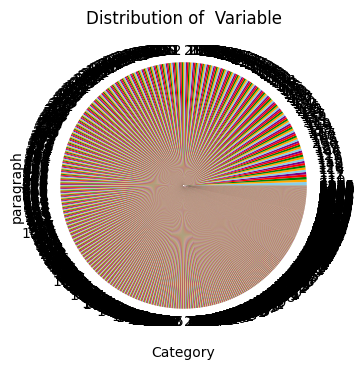

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Distribution of  Variable')
plt.xlabel('Category')
plt.ylabel('Count')
d.value_counts().plot(kind='pie',colors=['skyblue', 'orange', 'green', 'red', 'purple'])

<Axes: title={'center': 'Distribution of  Variable'}, ylabel='Count'>

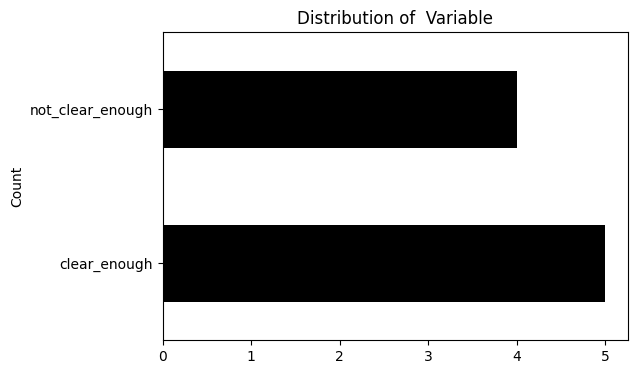

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Distribution of  Variable')
plt.xlabel('Text Clarity')
plt.ylabel('Count')
data['text_clarity'].value_counts().plot(kind='barh', color='black')

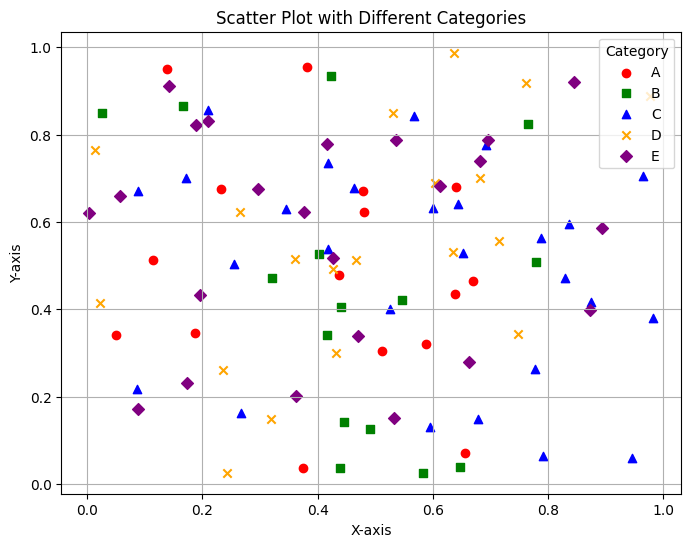

In [ ]:
# Sample data
categories = ['A', 'B', 'C', 'D', 'E']
x = np.random.rand(100)
y = np.random.rand(100)
category = np.random.choice(categories, 100)

# Create a dictionary to map each category to a unique marker and color
category_markers = {'A': 'o', 'B': 's', 'C': '^', 'D': 'x', 'E': 'D'}
category_colors = {'A': 'red', 'B': 'green', 'C': 'blue', 'D': 'orange', 'E': 'purple'}

# Plot the scatter plot with different markers and colors for each category
plt.figure(figsize=(8, 6))
for cat in categories:
    indices = np.where(category == cat)
    plt.scatter(x[indices], y[indices], marker=category_markers[cat], color=category_colors[cat], label=cat)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Different Categories')
plt.legend(title='Category')
plt.grid(True)
plt.show()

# Reading and Splitting data

In [ ]:
# Selecting the features and target variable
X = data[['paragraph','has_entity']]
Y = data[['text_clarity']]

In [ ]:
print(X.isna().sum())
print(Y.isna().sum())
print(Y.value_counts())

paragraph     0
has_entity    0
dtype: int64
text_clarity    9320
dtype: int64
text_clarity    
clear_enough        5
not_clear_enough    4
dtype: int64


In [ ]:
# Instantiate the SimpleImputer with a strategy (e.g., most_frequent)
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the selected columns
X_impute = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
#Y_impute = pd.DataFrame(imputer.fit_transform(Y), columns=X.columns)
# Display the DataFrame with imputed values
print(X_impute)
#print(Y_impute)

                                              paragraph  \
0     ramsay was born in glasgow on 2 october 1852. ...   
1     it has been widely estimated for at least the ...   
2     he went on to win the royal medal of the royal...   
3     the changes have altered many underlying assum...   
4     after these novels were published, disraeli de...   
...                                                 ...   
9324  sir joseph dalton hooker  was a british botani...   
9325  as successful invasions of india generally cam...   
9326  hawking was born on 8 january 1942 in oxford t...   
9327  more complex tasks can be making custom data e...   
9328  governments, and especially the police and cou...   

                           has_entity  
0      org_yes_product_no_person_yes_  
1       org_yes_product_no_person_no_  
2       org_yes_product_no_person_no_  
3       org_no_product_yes_person_no_  
4     org_yes_product_yes_person_yes_  
...                               ...  
9324   org_

In [ ]:
# Splitting data in the ratio 80:20% for training and testing
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)
print()
print(train_X.head(10))

(7463, 2)
(1866, 2)
(7463, 1)
(1866, 1)

                                              paragraph  \
7977   churchill reduced  21 of the 43 death  senten...   
5501  in june 2020, two unpublished pages of newton'...   
6992  the ubiquity of basic interpreters on personal...   
3967  the word teleology combines greek telos  and l...   
1397  he has explained that he feels the evidence al...   
3014  “an architect thinks creative, productive thou...   
3940   he wrote: "there must be no impatience, no ba...   
3936  the success of economic reforms partially miti...   
2415  moral realism is the class of theories which h...   
1043  as of april 2019, amazon had over 90,000 funct...   

                          has_entity  
7977  org_yes_product_no_person_yes_  
5501  org_yes_product_no_person_yes_  
6992    org_no_product_no_person_no_  
3967   org_yes_product_no_person_no_  
1397  org_yes_product_no_person_yes_  
3014    org_no_product_no_person_no_  
3940    org_no_product_no_person_no_

In [ ]:
# Labelling dataset based on parameter
train_X['manual_label'] = ''
count=0

# Drop rows with missing values in the entire dataset
train_X = train_X.dropna()
test_X = test_X.dropna()


# Manually labelling paragraphs based on 'has_entity' conditions
for index, row in train_X.iterrows():
    has_org = 'ORG_YES' in row['has_entity']
    has_product = 'PRODUCT_YES' in row['has_entity']
    has_person = 'PERSON_YES' in row['has_entity']

    if has_org == 'YES' or has_product == 'YES' or has_person == 'YES':
      train_X.at[index, 'manual_label'] = 'clear_enough'
    elif has_org == 'NO' and has_product == 'NO' and has_person == 'NO':
      train_X.at[index, 'manual_label'] = 'not_clear_enough'
    else:
      train_X.at[index, 'manual_label'] = 'clear_enough'

    count+=1

    if count == 100:
        break

# Display the labeled DataFrame
print(train_X[['paragraph', 'has_entity', 'manual_label']])

                                              paragraph  \
7977   churchill reduced  21 of the 43 death  senten...   
5501  in june 2020, two unpublished pages of newton'...   
6992  the ubiquity of basic interpreters on personal...   
3967  the word teleology combines greek telos  and l...   
1397  he has explained that he feels the evidence al...   
...                                                 ...   
5739  with the improvement of 3g and lte internet co...   
5196  identity does actually have valid uses though,...   
5395  the cpu knows what machine code to execute, ba...   
861   socrates here argues that while the materials ...   
7279  the goback statement is a return statement and...   

                          has_entity      manual_label  
7977  org_yes_product_no_person_yes_  not_clear_enough  
5501  org_yes_product_no_person_yes_  not_clear_enough  
6992    org_no_product_no_person_no_  not_clear_enough  
3967   org_yes_product_no_person_no_  not_clear_enough  
1397  

In [ ]:
# Manually labelling paragraphs based on 'has_entity' conditions

test_X['manual_label'] = ''
count=0

for index, row in test_X.iterrows():
    has_org = 'ORG_YES' in row['has_entity']
    has_product = 'PRODUCT_YES' in row['has_entity']
    has_person = 'PERSON_YES' in row['has_entity']
    nhas_org = 'ORG_NO' in row['has_entity']
    nhas_product = 'PRODUCT_NO' in row['has_entity']
    nhas_person = 'PERSON_NO' in row['has_entity']

    # Counting the number of entities with 'YES' labels
    count_yes = int(has_org) + int(has_product) + int(has_person)

    # Setting conditions based on the counting
    if has_org == 'YES' or has_product == 'YES' or has_person == 'YES':
      test_X.at[index, 'manual_label'] = 'clear_enough'
    elif has_org == 'NO' and has_product == 'NO' and has_person == 'NO':
      test_X.at[index, 'manual_label'] = 'not_clear_enough'
    else:
      test_X.at[index, 'manual_label'] = 'clear_enough'

    count+=1

    if count == 100:
        break

# Display the labeled DataFrame
print(test_X[['paragraph', 'has_entity', 'manual_label']])

                                              paragraph  \
4766  in the 1930s huxley visited kenya and other ea...   
2254  the kural text and its author have been highly...   
4890  following the death of their father, william s...   
1374  in both cases, it is assumed that the training...   
1011  in the open society and its enemies and the po...   
...                                                 ...   
1733  in june 1962, when he was 87, churchill had a ...   
2865  compared to fully visible belief networks such...   
7311  in cratylus, plato writes:but if the very natu...   
4225  bernardin considered opposition to abortion to...   
5658  taking advantage of the enormous number of rec...   

                           has_entity  manual_label  
4766    org_no_product_no_person_yes_  clear_enough  
2254  org_yes_product_yes_person_yes_  clear_enough  
4890   org_yes_product_no_person_yes_  clear_enough  
1374     org_no_product_no_person_no_  clear_enough  
1011    org_yes_produ

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to fill missing values in train_Y
train_Y_imputed = imputer.fit_transform(train_Y.values.reshape(-1, 1))

# Convert back to a DataFrame or Series if necessary
train_Y_imputed = pd.Series(train_Y_imputed.ravel(), index=train_Y.index)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

# Encoding the categorical data


In [ ]:
# Using Label Encoder for encoding the categorical data
label_encoder = LabelEncoder()
train_Y_encoded = label_encoder.fit_transform(train_X['manual_label'])
test_Y_encoded = label_encoder.transform(test_X['manual_label'])

In [ ]:
print(train_X.value_counts().sum())
print(test_X.value_counts().sum())

7463
1866


In [ ]:
# Trim train_Y_encoded to 100 values
train_Y_encoded_trimmed = train_Y_encoded[:100]

In [ ]:
# Drop rows with missing values in the 'paragraph' column
train_X = train_X.dropna(subset=['paragraph'])
test_X = test_X.dropna(subset=['paragraph'])

## Text Vectorization
vectorizer = TfidfVectorizer()
train_X_vector = vectorizer.fit_transform(train_X['paragraph'])
test_X_vector = vectorizer.transform(test_X['paragraph'])

In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with the desired number of components
pca = PCA(n_components=100)  # Adjust the number of components as needed

# Fit PCA to the training data and transform both training and testing data
train_X_pca = pca.fit_transform(train_X_vector.toarray())
test_X_pca = pca.transform(test_X_vector.toarray())


ValueError: 'c' argument has 7563 elements, which is inconsistent with 'x' and 'y' with size 7463.

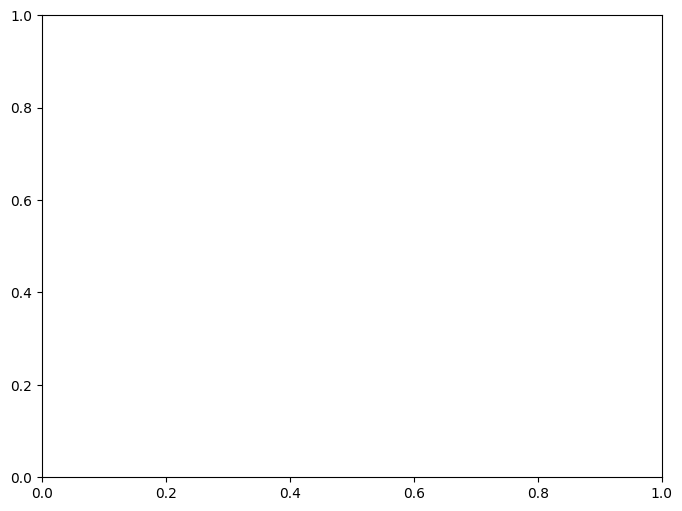

In [ ]:
# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(train_X_pca[:, 0], train_X_pca[:, 1], c=train_Y_encoded, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Manual Label')
plt.grid(True)
plt.show()

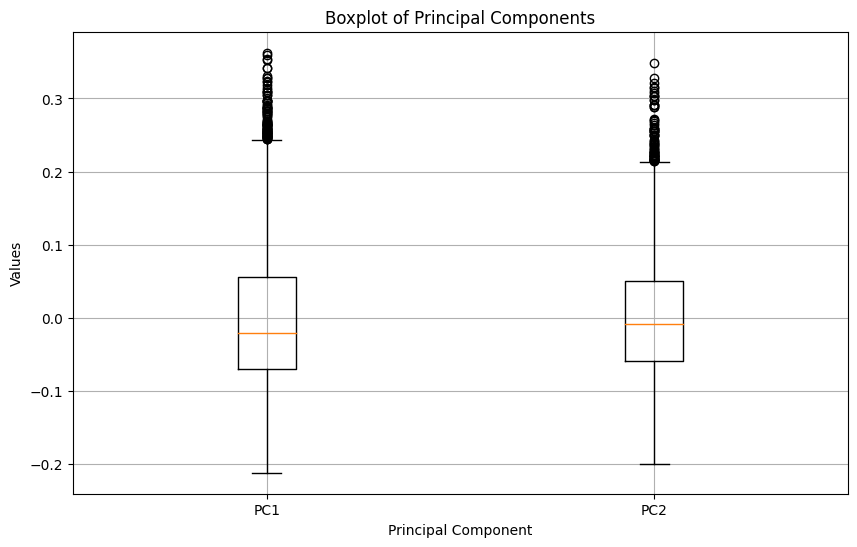

In [ ]:
# Create a boxplot for PC1 and PC2
plt.figure(figsize=(10, 6))
plt.boxplot([PC1, PC2], labels=['PC1', 'PC2'])
plt.title('Boxplot of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Values')
plt.grid(True)
plt.show()

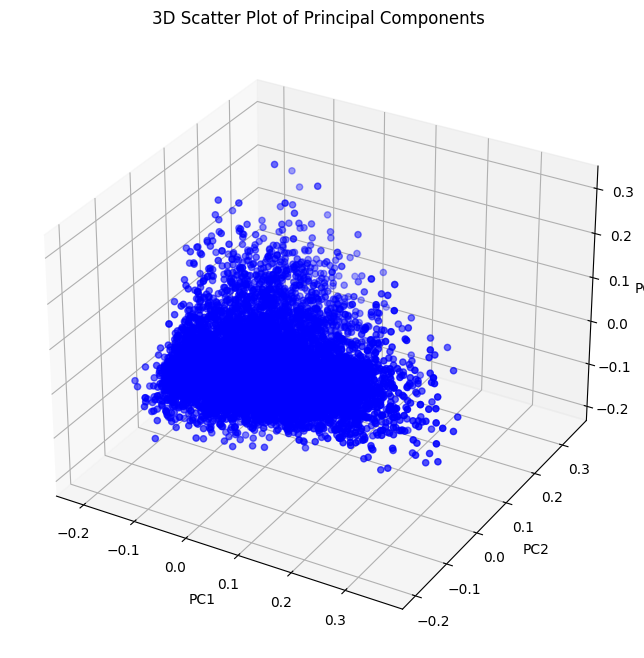

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_X_vector.toarray())

# Extract PC1, PC2, and PC3
PC1 = pca_result[:, 0]
PC2 = pca_result[:, 1]
PC3 = pca_result[:, 2]

# Create a 3D scatter plot of the principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(PC1, PC2, PC3, c='b', marker='o')

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Principal Components')

plt.show()

In [ ]:
# Target variable
train_Y = train_Y_encoded
test_Y = test_Y_encoded

In [ ]:
# Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Setting up the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

train_X_vector = train_X_vector[:7463]
train_Y = train_Y[:7463]

# Training the Model
random_forest_classifier.fit(train_X_vector, train_Y)

# Making Predictions with Random Forest Classifier
pred_Y_rf = random_forest_classifier.predict(test_X_vector)

# Displaying Accuracy
accuracy_rf = accuracy_score(test_Y, pred_Y_rf)
print(f'Accuracy with Random Forest Classifier: {accuracy_rf:.2f}')

Accuracy with Random Forest Classifier: 1.00


In [ ]:
## Using logistic regression machine learning algorithm

# Setting up the Logistic Regression Classifier
logistic_regression = LogisticRegression(random_state=42)

# Training the Model
logistic_regression.fit(train_X_vector, train_Y)

# Making Predictions with Logistic Regression
pred_Y_logistic = logistic_regression.predict(test_X_vector)

# Displaying Accuracy
accuracy_logistic = accuracy_score(test_Y, pred_Y_logistic)
print(f'Accuracy with Logistic Regression: {accuracy_logistic:.2f}')

Accuracy with Logistic Regression: 1.00


In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(7463, 3)
(7463,)
(1866, 3)
(1866,)


In [ ]:
print("Size of train_Y:", len(train_Y))

Size of train_Y: 7463


In [ ]:
conf_matrix = confusion_matrix(test_Y, pred_Y_logistic)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1866]]


In [ ]:
class_report = classification_report(test_Y, pred_Y_rf)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1866
           1       0.00      0.00      0.00         0

    accuracy                           1.00      1866
   macro avg       0.50      0.50      0.50      1866
weighted avg       1.00      1.00      1.00      1866



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.dummy import DummyClassifier

# Create a DummyClassifier with strategy 'most_frequent'
dummy_clf = DummyClassifier(strategy="uniform")

# Training the DummyClassifier on the training data
dummy_clf.fit(train_X, train_Y)

# Predicting the majority class for all samples in the test set
baseline_pred = dummy_clf.predict(test_X)

# Calculating the accuracy of the trivial baseline
baseline_accuracy = accuracy_score(test_Y, baseline_pred)
print("Trivial Baseline Accuracy:", baseline_accuracy)